# Regression

# AIRBNB Price Prediction in NYC

In this project we take data of Airbnb listings in the NYC,US and try to predict the price of stay in that listing.

The data includes 4852 listings and 29 columns - including log_price, what we are trying to predict.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid
import warnings
warnings.filterwarnings('ignore')

In [2]:
NYC_data = pd.read_csv('NYC_AirBNB .csv')

In [3]:
NYC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 30 columns):
Unnamed: 0                4852 non-null int64
id                        4852 non-null int64
log_price                 4852 non-null float64
property_type             4852 non-null object
room_type                 4852 non-null object
amenities                 4852 non-null object
accommodates              4852 non-null int64
bathrooms                 4838 non-null float64
bed_type                  4852 non-null object
cancellation_policy       4852 non-null object
cleaning_fee              4852 non-null object
city                      4852 non-null object
description               4852 non-null object
first_review              3833 non-null object
host_has_profile_pic      4814 non-null object
host_identity_verified    4814 non-null object
host_response_rate        3348 non-null object
host_since                4814 non-null object
instant_bookable          4852 non-null object
l

In [4]:
NYC_data.head()

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,16553,44472,4.382027,Condominium,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,...,40.762239,-73.981589,Luxury bedroom in Times Square,Times Square/Theatre District,1,NaN,https://a0.muscache.com/im/pictures/101584608/...,10019,1.0,1.0
1,12555,7007348,5.075174,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,strict,...,40.677892,-73.992054,Stylish and bright one bedroom,Gowanus,17,98.0,https://a0.muscache.com/im/pictures/cc7d769d-9...,11231,1.0,2.0
2,15012,10283574,4.852030,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,...,40.741380,-73.998753,Sunny Chelsea Studio,Chelsea,6,93.0,https://a0.muscache.com/im/pictures/2a690ce6-2...,NaN,0.0,2.0
3,21502,1754527,5.010635,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,...,40.800331,-73.965090,BEAUTIFUL 1BR APT ON THE UPPER WEST,Upper West Side,49,96.0,NaN,10025,1.0,2.0
4,13431,16823953,4.317488,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,...,40.711386,-73.963529,1st floor room in the heart of Williamsburg,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/bc456a57-b...,11249,1.0,1.0


In [5]:
Conversion = {'Condo':['Timeshare','Loft','Guest suite','Condominium','Serviced apartment'],
         'Housing':['Vacation home','Townhouse','Casa particular','Villa','In-law'],
         'Hotel type 1':['Dorm','Guesthouse','Hostel'],
         'Hotel type 2':['Bed & Breakfast','Boutique hotel'],
         'Other':['Island','Yurt','Hut','Treehouse',
                  'Earth House','Tipi','Train','Parking Space','Lighthouse',
                 'Cabin','Camper/RV','Bungalow','Cave','Castle','Chalet','Boat','Tent']
        }
Conversion_real = {i : k for k, v in Conversion.items() for i in v}
NYC_data['property_type'].replace(Conversion_real,inplace =True)

In [6]:
#imputing values with mean, median and mode
#mode is 1.0
NYC_data['bathrooms'].fillna(NYC_data['bathrooms'].mode()[0],inplace=True)
#mean is 93.50
NYC_data['review_scores_rating'].fillna(NYC_data['review_scores_rating'].mean(),inplace=True)
#mode is 1 bedroom
NYC_data['bedrooms'].fillna(NYC_data['bedrooms'].mode()[0],inplace=True)
#mode is 1 bed
NYC_data['beds'].fillna(NYC_data['beds'].mode()[0],inplace=True)

In [7]:
#Removing the null values from is_null
Remove_null=pd.DataFrame({"val":NYC_data['zipcode'].isnull()})
NYC_data=NYC_data[Remove_null['val']==False]

In [8]:
NYC_data=NYC_data.drop(['Unnamed: 0','amenities','bed_type','city','description','first_review',
                        'host_has_profile_pic','host_identity_verified','host_response_rate','host_since'
                       ,'last_review','name','neighbourhood','thumbnail_url','zipcode','id'],axis=1)

In [9]:
NYC_data.isnull().sum()

log_price               0
property_type           0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [10]:
#categorical=['property_type','room_type','cancellation_policy','instant_bookable']
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['property_type'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['room_type'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['cancellation_policy'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['instant_bookable'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['cleaning_fee'])),axis=1)

In [11]:
NYC_data=NYC_data.drop(['property_type','room_type','cancellation_policy','instant_bookable','cleaning_fee'],axis=1)

In [12]:
NYC_data.isnull().sum()

log_price               0
accommodates            0
bathrooms               0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
Apartment               0
Condo                   0
Hotel type 1            0
Hotel type 2            0
House                   0
Housing                 0
Other                   0
Entire home/apt         0
Private room            0
Shared room             0
flexible                0
moderate                0
strict                  0
Instant Booking         0
No Instant Booking      0
Cleaning Fee Req        0
No Cleaning Fee         0
dtype: int64

In [13]:
target = NYC_data['log_price']
target_df = pd.DataFrame(target)
target_df.head()

,log_price
0,4.382027
1,5.075174
3,5.010635
4,4.317488
5,5.416100


In [14]:
features_df=NYC_data.drop(['log_price'],axis=1)
features_df.head()

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Apartment,Condo,...,Entire home/apt,Private room,Shared room,flexible,moderate,strict,Instant Booking,No Instant Booking,Cleaning Fee Req,No Cleaning Fee
0,1,1.0,40.762239,-73.981589,1,93.493216,1.0,1.0,0,1,...,0,1,0,1,0,0,0,1,0,1
1,3,1.0,40.677892,-73.992054,17,98.000000,1.0,2.0,1,0,...,1,0,0,0,0,1,0,1,1,0
3,4,1.0,40.800331,-73.965090,49,96.000000,1.0,2.0,1,0,...,1,0,0,0,0,1,0,1,1,0
4,2,1.0,40.711386,-73.963529,0,93.493216,1.0,1.0,1,0,...,0,1,0,1,0,0,1,0,0,1
5,5,1.0,40.726874,-73.979947,0,93.493216,2.0,2.0,1,0,...,1,0,0,1,0,0,0,1,1,0


In [15]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(features_df,target_df, test_size=0.25, random_state = 0)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [17]:
X_train = pd.DataFrame(X_train, columns = X_train_org.columns)
print('Train dataset dimensionality:' , X_train.shape)
print('Train dataset dimensionality:' , y_train.shape)

Train dataset dimensionality: (3591, 25)
Train dataset dimensionality: (3591, 1)


## Bagging
Bagging allows training instances to be sampled several times for the same predictor. To perform bagging, we have the hyper parameter 'bootstrap' which is responsible for aggregation and is set to True while building the model.

### Model 1 - Decision Tree Classifier

In [18]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.61


In [19]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.67


In [20]:
# building the bagging model for Decision Tree Regressor using the best parameters
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 6, random_state=0)
bag_dt_reg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0)

bag_dt_reg.fit(X_train, y_train)
y_pred = bag_dt_reg.predict(X_test)

print('Score after Bagging on Decision Tree Regressor on Train Set: {:.2f}'.format(bag_dt_reg.score(X_train, y_train)))
print('Score after Bagging on Decision Tree Regressor on Test Set: {:.2f}'.format(bag_dt_reg.score(X_test, y_test)))

Score after Bagging on Decision Tree Regressor on Train Set: 0.70
Score after Bagging on Decision Tree Regressor on Test Set: 0.65


### Model 2 - Ridge Regressor

In [21]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 200}
Best cross-validation score: 0.67


In [22]:
#Grid Search to find best parameter for Ridge Regressor
from  sklearn.linear_model import Ridge
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.58


In [23]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
bag_ri_reg = BaggingRegressor(ridge, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0)

bag_ri_reg.fit(X_train, y_train)
y_pred = bag_ri_reg.predict(X_test)

print('Score after Bagging on Ridge Regressor on Train Set: {:.2f}'.format(bag_ri_reg.score(X_train, y_train)))
print('Score after Bagging on Ridge Regressor on Test Set: {:.2f}'.format(bag_ri_reg.score(X_test, y_test)))

Score after Bagging on Ridge Regressor on Train Set: 0.59
Score after Bagging on Ridge Regressor on Test Set: 0.56


## Pasting 

When sampling is performed without replacement, it is called pasting. To perform pasting, we have the hyper parameter 'bootstrap' which is responsible for aggregation set to False while building the model.

### Model 1 - KNN Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
param_grid_knn = {
            'n_neighbors' : [*range(1,20,2)],
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

CrossValidation_knn = GridSearchCV(estimator =knn, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_knn.fit(X_train, y_train)

best_parameters_knn=CrossValidation_knn.best_params_
print(best_parameters_knn)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   50.8s


{'algorithm': 'auto', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   56.5s finished


In [25]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.67


In [26]:
knn =KNeighborsRegressor(n_neighbors=13,weights='distance',algorithm='auto',p=1)
bag_knn_reg = BaggingRegressor(knn, n_estimators=500, max_samples=500, bootstrap=False, n_jobs=-1, random_state=0)

bag_knn_reg.fit(X_train, y_train)
y_pred = bag_knn_reg.predict(X_test)

print('Score after Pasting on KNN Regressor on Train Set: {:.2f}'.format(bag_knn_reg.score(X_train, y_train)))
print('Score after Pasting on KNN Regressor on Test Set: {:.2f}'.format(bag_knn_reg.score(X_test, y_test)))

Score after Pasting on KNN Regressor on Train Set: 0.66
Score after Pasting on KNN Regressor on Test Set: 0.54


### Model 2 - Lasso Regressor

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.67


In [28]:
from  sklearn.linear_model import Lasso
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.58


In [29]:
lasso = Lasso(alpha=0.01)
bag_lasso_reg = BaggingRegressor(lasso, n_estimators=500, max_samples=500, bootstrap=False, n_jobs=-1, random_state=0)

bag_lasso_reg.fit(X_train, y_train)
y_pred = bag_lasso_reg.predict(X_test)

print('Score after Pasting on Lasso Regressor on Train Set: {:.2f}'.format(bag_lasso_reg.score(X_train, y_train)))
print('Score after Pasting on Lasso Regressor on Test Set: {:.2f}'.format(bag_lasso_reg.score(X_test, y_test)))

Score after Pasting on Lasso Regressor on Train Set: 0.52
Score after Pasting on Lasso Regressor on Test Set: 0.49


# Adaboosting 
Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”.

### Model 1 - Decison Tree 

In [30]:
# Grid search to find the best adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best cross-validation score: 0.58


In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth = 6, random_state=0)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

print('Decision tree regressor score on Train Set score: {:.2f}'.format(dt_reg.score(X_train, y_train)))
print('Decision tree regressor score on Test Set score: {:.2f}'.format(dt_reg.score(X_test, y_test)))

Decision tree regressor score on Train Set score: 0.70
Decision tree regressor score on Test Set score: 0.60


In [32]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=100,  learning_rate=0.05, random_state=0)
ada_reg.fit(X_train, y_train)

print('Decision tree regressor score on Train Set after Adaboost Boosting: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Decision tree regressor score on Test Set after Adaboost Boosting: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Decision tree regressor score on Train Set after Adaboost Boosting: 0.73
Decision tree regressor score on Test Set after Adaboost Boosting: 0.64


### Model 2 - KNN Regressor

In [33]:
# Grid search to find the best adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best cross-validation score: 0.58


In [34]:
from sklearn.neighbors import KNeighborsRegressor
lreg = KNeighborsRegressor(n_neighbors=3)
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)
print('KNN regressor score on Train Set score: {:.2f}'.format(lreg.score(X_train, y_train)))
print('KNN regressor score on Test Set score: {:.2f}'.format(lreg.score(X_test, y_test)))

KNN regressor score on Train Set score: 0.77
KNN regressor score on Test Set score: 0.50


In [35]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=3), n_estimators=100,  learning_rate=0.05, random_state=0)
ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)
print('KNN regressor score on Train Set after Adaboost Boosting: {:.3f}'.format(ada_reg.score(X_train, y_train)))
print('KNN regressor score on Test Set after Adaboost Boosting: {:.3f}'.format(ada_reg.score(X_test, y_test)))


KNN regressor score on Train Set after Adaboost Boosting: 0.869
KNN regressor score on Test Set after Adaboost Boosting: 0.488


# Gradient Boosting 
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 

In [36]:
# grid search for finding the best parameters for gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1], 'max_depth': np.arange(1, 6)}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Best cross-validation score: 0.67


In [37]:
# building the model with best parameters
gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.1, max_depth = 2, n_estimators=200)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print("Score after Gradient Boosting on Train Set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Score after Gradient Boosting on Train Set: {:.3f}".format(gbrt.score(X_test, y_test)))

Score after Gradient Boosting on Train Set: 0.723
Score after Gradient Boosting on Train Set: 0.662


# PCA

In [38]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

#use PCA to reduce the size of the feature space while retaining 95% of the explained variance
pca_regression = PCA(n_components = .95)

#fit the model with X_train and apply the dimensionality reduction on X_train
X_train_reg = pca_regression.fit_transform(X_train)

#apply the dimesionality reduction on X_test
X_test_reg = pca_regression.transform(X_test)

In [39]:
#number of component preserved while retaining 95% of the explained variance
pca_regression.n_components_

8

In [40]:
#list of the variance ration of the 8 components preserved after PCA
pca_regression.explained_variance_ratio_

array([0.27136722, 0.18407177, 0.15301691, 0.13260318, 0.09273389,
       0.07741381, 0.02306154, 0.01671507])

### Model 1 - KNN Regressor

In [41]:
#list the best parameter value for KNN regressor
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reg, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.54


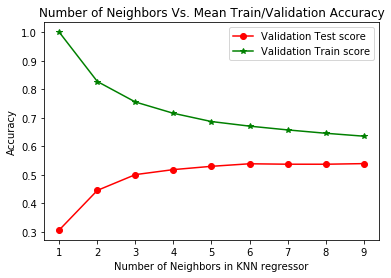

In [42]:
#visualizing the train and test accuracy score for KNN Regressor
import matplotlib.pyplot as plt
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

In [43]:
#train and test accuracy score for KNN Regressor after running PCA
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train_reg, y_train)
print('Train score on best parameters for KNN Regressor {}'.format(knn.score(X_train_reg,y_train)))
print('Test score on best parameters for KNN Regressor {}'.format(knn.score(X_test_reg,y_test)))

Train score on best parameters for KNN Regressor 0.6438299394825808
Test score on best parameters for KNN Regressor 0.5320664097763761


### Model 2 - Linear Regression 

In [44]:
#train and test accuracy score for linear regression after running PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()

regressor.fit(X_train_reg, y_train)
print('Train Score for Linear Regression model : {:.3f}'.format(regressor.score(X_train_reg, y_train)))
print('Test Score for Linear Regression model : {:.3f}\n'.format(regressor.score(X_test_reg, y_test)))
print('R-squared score (training): {:.3f}\n'.format(regressor.score(X_train_reg, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test_reg, y_test)))

Train Score for Linear Regression model : 0.459
Test Score for Linear Regression model : 0.437

R-squared score (training): 0.459

R-squared score (test): 0.437


### Model 3 - Ridge Regressor

In [45]:
#list the best parameter value for ridge regressor
from  sklearn.linear_model import Ridge
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 3, 5, 10, 12, 15, 20, 100]}
grid_search_ridge = GridSearchCV(Ridge( random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search_ridge.fit(X_train_reg, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))

Best parameters: {'alpha': 5}
Best cross-validation score: 0.45


In [46]:
#train and test accuracy score for ridge regression after running PCA
ridge = Ridge(alpha=3)
ridge.fit(X_train_reg, y_train)
print('Train score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_train_reg,y_train)))
print('Test score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_test_reg,y_test)))

Train score on best parameters for Ridge regressor 0.459
Test score on best parameters for Ridge regressor 0.437


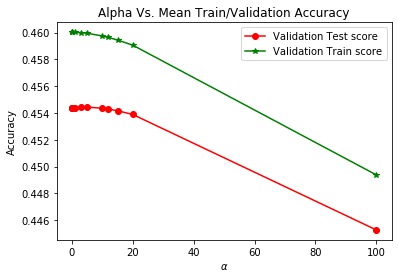

In [47]:
#visualizing the train and test accuracy score for Ridge regression
import matplotlib.pyplot as plt
results = pd.DataFrame(grid_search_ridge.cv_results_)
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

### Model 4 -  Lasso Regressor

In [48]:
#list the best parameter value for lasso regressor
from  sklearn.linear_model import Lasso
param_grid = {'alpha':[0.001,0.01, 0.1, 1, 3, 5,10, 12,15,20, 100]}
grid_search_lasso = GridSearchCV(Lasso(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search_lasso.fit(X_train_reg, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.45


In [49]:
#train and test accuracy score for lasso regression after running PCA
results = pd.DataFrame(grid_search_lasso.cv_results_)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_reg, y_train)
print('Train score on best parameters for Lasso Regressor {:.3f}'.format(lasso.score(X_train_reg,y_train)))
print('Test score on best parameters for lasso Regressor {:.3f}'.format(lasso.score(X_test_reg,y_test)))

Train score on best parameters for Lasso Regressor 0.459
Test score on best parameters for lasso Regressor 0.437


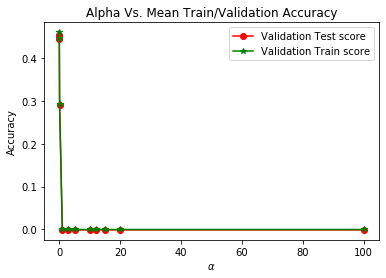

In [50]:
#visualizing the train and test accuracy score for lasso regression
import matplotlib.pyplot as plt
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

### Model 5 - Support Vector Machine Regressor

In [51]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reg, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 100}
Best cross-validation score: 0.55


In [52]:
#list of the train and test accuracy score of the kernalized SVM regression model after running PCA
clf1 = LinearSVR(C=10).fit(X_train_reg, y_train)
clf2 = SVR(kernel='linear', C=10).fit(X_train_reg, y_train)
clf3 = SVR(kernel='rbf', gamma=100, C=10).fit(X_train_reg, y_train)
clf4 = SVR(kernel='poly', degree=3, C=10).fit(X_train_reg, y_train)
print('Train score on best parameters for LinearSVR - {}'.format(clf1.score(X_train_reg,y_train)))
print('Test score on best parameters ffor LinearSVR - {}'.format(clf1.score(X_test_reg,y_test)))
print('Train score on best parameters for SVR kernel - Linear {}'.format(clf2.score(X_train_reg,y_train)))
print('Test score on best parameters for SVR kernel - Linear {}'.format(clf2.score(X_test_reg,y_test)))
print('Train score on best parameters for SVR kernel - rbf {}'.format(clf3.score(X_train_reg,y_train)))
print('Test score on best parameters for SVR kernel - rbf {}'.format(clf3.score(X_test_reg,y_test)))
print('Train score on best parameters for SVR kernel - poly {}'.format(clf4.score(X_train_reg,y_train)))
print('Test score on best parameters for SVR kernel - poly {}'.format(clf4.score(X_test_reg,y_test)))

Train score on best parameters for LinearSVR - 0.4528395868952667
Test score on best parameters ffor LinearSVR - 0.4239713131192112
Train score on best parameters for SVR kernel - Linear 0.45571051844066124
Test score on best parameters for SVR kernel - Linear 0.4259446556263019
Train score on best parameters for SVR kernel - rbf 0.7157144247178107
Test score on best parameters for SVR kernel - rbf 0.544417917575396
Train score on best parameters for SVR kernel - poly 0.477254246397784
Test score on best parameters for SVR kernel - poly 0.4398771932689186


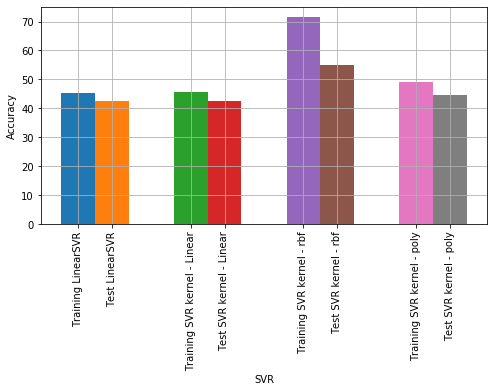

In [54]:
#visualization of the train and test score of kernalized SVM regression models after applying PCA
fig, ax = plt.subplots(figsize=(8,4))
width = 0.3
plt.xlabel('SVR')
plt.ylabel('Accuracy')
labels = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
labels1 = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
list_ticks = [0,.3,1,1.3,2,2.3,3,3.3]
ax.set_xticks(list_ticks)
for j in range(0,4,1) :
    ax.set_xticklabels(labels,rotation=90)
    ax.set_xticklabels(labels1,rotation=90)
accuracies_train=[45.38,45.57,71.57,49.05]
accuracies_test=[42.42,42.59,55.01,44.76]
for i in range(0,4,1) :
    ax.bar(i,accuracies_train[i],width)
    ax.bar(i+width,accuracies_test[i],width)
plt.grid()

### Model 6 - Polynomial Regression 

In [55]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_reg_poly = poly.fit_transform(X_train_reg)
    X_test_reg_poly = poly.transform(X_test_reg)
    regressor.fit(X_train_reg_poly, y_train)
    train_score_list.append(regressor.score(X_train_reg_poly, y_train))
    test_score_list.append(regressor.score(X_test_reg_poly, y_test))
    
train = [sum(train_score_list)/len(train_score_list)]
test = [sum(test_score_list)/len(test_score_list)]
print(train)
print(test)

[0.5509409687032275]
[0.5029318211355994]


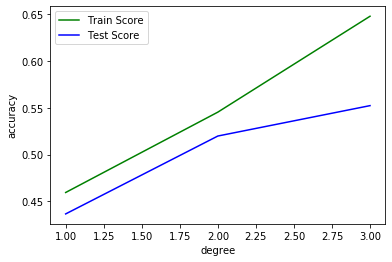

In [56]:
x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

### Comparing Models before and after PCA

In [57]:
#Index Levels
outside = ['Before PCA','Before PCA','After PCA','After PCA']
inside = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [58]:
#train and test accuracy score of the models as observed before and after PCA
data_class = np.array([(0.5935,0.5900,0.6514,0.5935,0.5894,0.3634,0.8042,0.5825,0.5612),
                     (0.5582,0.5581,0.5782,0.5585,0.5567,0.3875,0.5161,0.5425,0.5212),
                     (0.4590,0.5509,0.6438,0.4590,0.4560,0.4509,0.7157,0.4557,0.5361),
                     (0.4370,0.5029,0.5321,0.4370,0.4340,0.4208,0.544,0.4259,0.4932)])

In [59]:
df = pd.DataFrame(data_class,index=hier_index,columns=['Linear Regression','Polynomial Regressor','KNN Regressor',
                                                       'Ridge Regressor','Lasso Regressor','Linear SVR','SVM - RBF Kernel','SVM - Linear Kernel','SVM - Poly Kernel'])

In [61]:
#visualizing the accuracy score in a table format
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='Pastel1')
s


## Conclusion after PCA : 
In most of the models the training/test accuracy score is better before applying PCA.When working with PCA we have reduced components to 8 which would improve the computational time however there is a compromise in the accuracy which makes it not an ideal choice. So we would go forward with Models with no PCA applied.

# Deep Learning 

In [62]:
#install the packages
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [63]:
#set seed for reproducibility
seed = 10
np.random.seed(10)

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [66]:
model = KerasClassifier(build_fn = create_model, verbose = 0)
#grid search to find the best epochs and batch size 
param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [67]:
#fit the grid search on the test dataset
grid_search_result = grid_search.fit(X_test, y_test)
grid_search_result

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002575840E048>,
             iid='warn', n_jobs=None,
             param_grid={'batch_size': [10, 20, 30, 40],
                         'epochs': [10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
#list the best parameter
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'batch_size': 10, 'epochs': 10}


In [91]:
#create model
model = Sequential()
#the first hidden input layer with 200 neuron nodes 
model.add(Dense(200, input_dim=25, kernel_initializer='normal', activation='relu'))
#the second hidden input layer with 200 neuron nodes creating a funnel shape
model.add(Dense(200,kernel_initializer='normal', activation='relu'))
#the third hidden input layer with 200 neuron nodes creating a funnel shape
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
#output layer
model.add(Dense(1, kernel_initializer='normal'))

In [98]:
#Compile model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [99]:
#fit the best paramter value obtained from grid search on the train dataset
model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
3591/3591 [==============================] - 1s 317us/step - loss: 0.1227 - mse: 0.1227
Epoch 2/100
3591/3591 [==============================] - 1s 284us/step - loss: 0.1200 - mse: 0.1200
Epoch 3/100
3591/3591 [==============================] - 1s 270us/step - loss: 0.1186 - mse: 0.1186
Epoch 4/100
3591/3591 [==============================] - 1s 285us/step - loss: 0.1205 - mse: 0.1205
Epoch 5/100
3591/3591 [==============================] - 1s 304us/step - loss: 0.1169 - mse: 0.1169
Epoch 6/100
3591/3591 [==============================] - 1s 273us/step - loss: 0.1182 - mse: 0.1182
Epoch 7/100
3591/3591 [==============================] - 1s 241us/step - loss: 0.1188 - mse: 0.1188
Epoch 8/100
3591/3591 [==============================] - 1s 267us/step - loss: 0.1168 - mse: 0.1168
Epoch 9/100
3591/3591 [==============================] - 1s 221us/step - loss: 0.1174 - mse: 0.1174
Epoch 10/100
3591/3591 [==============================] - 1s 239us/step - loss: 0.1228 - mse: 0.1228

In [100]:
#evaluate the score of the model 
model.evaluate(X_test, y_test)

1198/1198 [==============================] - 0s 51us/step


[0.18642983074379285, 0.18642984330654144]

In [101]:
#evaluate the r2_score on the train and test dataset 
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.77
Test score: 0.57


In [102]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1198/1198 [==============================] - 0s 37us/step

mse: 18.64%


# Classification

# INCOME CLASSIFICATION
Attribute Information:
Variable Definition Key Age Age
Workplace Workplace Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked fnlwgt fnlwgt
education education Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool education-num equivalent numeric representation for education 10th Standard- 6, 11th Standard - 7, 12th Standard - 8, 1st-4th standard- 2, 5th-6th standard - 3, 7th-8th standard- 4, 9th Standard - 5, Assoc-acdm-12, Assoc-voc-11,Bachelors -13, Doctorate - 16, HS-grad -9, some-college-10,Prof-scgool-15, Masters -14, Preschool-1, marital-status Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse relationship Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried race White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex Female, Male hours-per-week number of hours worked in a week
native-country country to which the person belongs
income if income is above 50K or below 50K income>50K - 1, income<= 50K - 0

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix


In [108]:
#read the csv file in a variable named income_data
income_data = pd.read_csv('income_evaluation.csv')

In [109]:
#get a concise summary of the dataframe column
income_data.info()
income_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 15 columns):
age               1501 non-null float64
workclass         1495 non-null object
fnlwgt            1499 non-null float64
education         1491 non-null object
education-num     1483 non-null float64
marital-status    1493 non-null object
occupation        1492 non-null object
relationship      1494 non-null object
race              1492 non-null object
sex               1498 non-null object
capital-gain      1490 non-null float64
capital-loss      1498 non-null float64
hours-per-week    1491 non-null float64
native-country    1491 non-null object
income            1508 non-null int64
dtypes: float64(6), int64(1), object(8)
memory usage: 176.8+ KB


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [110]:
#get a sum of the null values in the dataframe column
income_data.isnull().sum()

age                7
workclass         13
fnlwgt             9
education         17
education-num     25
marital-status    15
occupation        16
relationship      14
race              16
sex               10
capital-gain      18
capital-loss      10
hours-per-week    17
native-country    17
income             0
dtype: int64

In [111]:
#computes a summary of statistics pertaining to the DataFrame numeric columns
income_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,1501.000000,1.499000e+03,1483.00000,1490.000000,1498.000000,1491.00000,1508.000000
mean,39.072618,1.908296e+05,10.08766,812.157718,80.324433,40.90275,0.253316
std,13.277929,1.065347e+05,2.57893,5114.319920,383.091092,11.52473,0.435054
min,17.000000,1.882700e+04,1.00000,0.000000,0.000000,1.00000,0.000000
25%,29.000000,1.169095e+05,9.00000,0.000000,0.000000,40.00000,0.000000
50%,38.000000,1.785300e+05,10.00000,0.000000,0.000000,40.00000,0.000000
75%,48.000000,2.392015e+05,13.00000,0.000000,0.000000,45.00000,1.000000
max,90.000000,1.085515e+06,16.00000,99999.000000,2754.000000,99.00000,1.000000


In [112]:
#computes a summary of statistics pertaining to the DataFrame object columns
income_data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,1495,1491,1493,1492,1494,1492,1498,1491
unique,6,16,7,13,6,5,2,31
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,1087,498,711,205,628,1256,1016,1342


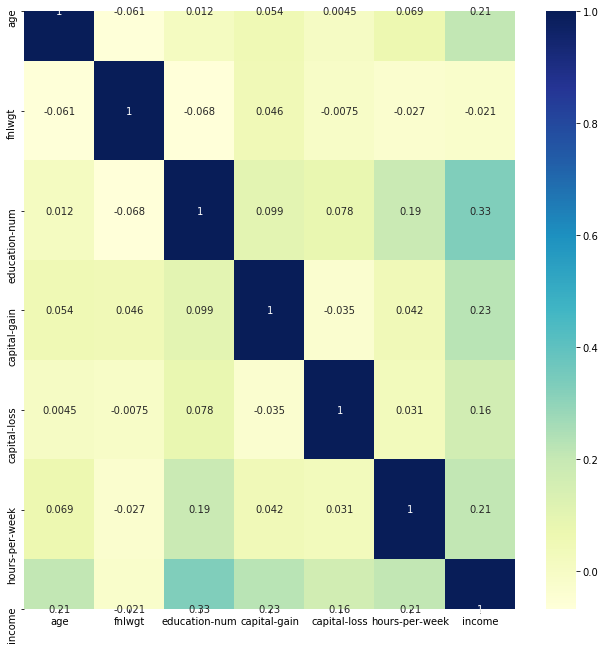

In [113]:
plt.figure(figsize=(11,11)) 
sns.heatmap(income_data.corr(), annot=True, cmap="YlGnBu")

# Feature Scaling
We are verifying the ditribution of data, whether the data is normally distributed or not.

Encoding the categorical data

In [114]:
#creates a new dataframe which consists of zeros and ones for categorical columns in the data frame
income_data=pd.concat((income_data,pd.get_dummies(income_data['workclass'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['marital-status'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['occupation'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['relationship'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['race'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['sex'])),axis=1)

In [115]:
#removes the duplicate columns from the data frame
income_data = income_data.loc[:,~income_data.columns.duplicated()]
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 54 columns):
age                       1501 non-null float64
workclass                 1495 non-null object
fnlwgt                    1499 non-null float64
education                 1491 non-null object
education-num             1483 non-null float64
marital-status            1493 non-null object
occupation                1492 non-null object
relationship              1494 non-null object
race                      1492 non-null object
sex                       1498 non-null object
capital-gain              1490 non-null float64
capital-loss              1498 non-null float64
hours-per-week            1491 non-null float64
native-country            1491 non-null object
income                    1508 non-null int64
 Federal-gov              1508 non-null uint8
 Local-gov                1508 non-null uint8
 Private                  1508 non-null uint8
 Self-emp-inc             1508 non-null uint8

In [116]:
#drop the categorical and unwanted columns 
income_data=income_data.drop(['fnlwgt','capital-gain','capital-loss','workclass','marital-status','occupation','relationship',
                  'race','sex','education','native-country'],axis=1)

In [117]:
income_data.isnull().sum()

age                        7
education-num             25
hours-per-week            17
income                     0
 Federal-gov               0
 Local-gov                 0
 Private                   0
 Self-emp-inc              0
 Self-emp-not-inc          0
 State-gov                 0
 Divorced                  0
 Married-AF-spouse         0
 Married-civ-spouse        0
 Married-spouse-absent     0
 Never-married             0
 Separated                 0
 Widowed                   0
 Adm-clerical              0
 Craft-repair              0
 Exec-managerial           0
 Farming-fishing           0
 Handlers-cleaners         0
 Machine-op-inspct         0
 Other-service             0
 Priv-house-serv           0
 Prof-specialty            0
 Protective-serv           0
 Sales                     0
 Tech-support              0
 Transport-moving          0
 Husband                   0
 Not-in-family             0
 Other-relative            0
 Own-child                 0
 Unmarried    

In [118]:
#data imputation of the missing values by the column median, mean and mode 
income_data['age'].fillna(income_data['age'].median(),inplace=True)
income_data['hours-per-week'].fillna(income_data['hours-per-week'].mean(),inplace=True)
income_data['education-num'].fillna(income_data['education-num'].mode()[0],inplace=True,axis = 0)

In [119]:
#get a concise summary of the dataframe column
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 43 columns):
age                       1508 non-null float64
education-num             1508 non-null float64
hours-per-week            1508 non-null float64
income                    1508 non-null int64
 Federal-gov              1508 non-null uint8
 Local-gov                1508 non-null uint8
 Private                  1508 non-null uint8
 Self-emp-inc             1508 non-null uint8
 Self-emp-not-inc         1508 non-null uint8
 State-gov                1508 non-null uint8
 Divorced                 1508 non-null uint8
 Married-AF-spouse        1508 non-null uint8
 Married-civ-spouse       1508 non-null uint8
 Married-spouse-absent    1508 non-null uint8
 Never-married            1508 non-null uint8
 Separated                1508 non-null uint8
 Widowed                  1508 non-null uint8
 Adm-clerical             1508 non-null uint8
 Craft-repair             1508 non-null uint8
 Exec-manager

In [120]:
#forming income as the target variable
target = income_data['income']
target_df = pd.DataFrame(target)
target_df

,income
0,1
1,0
2,0
3,0
4,0
...,...
1503,0
1504,1
1505,0
1506,1


In [121]:
#variables other than income are 
features_df=income_data.drop(['income'],axis=1)
features_df

,age,education-num,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Divorced,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39.0,14.0,24.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,43.0,9.0,44.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,32.0,13.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,28.0,10.0,40.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,39.0,13.0,40.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,25.0,13.0,15.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1504,84.0,9.0,13.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1505,37.0,9.0,72.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1506,52.0,16.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Data Scaling


In [122]:
#preprocessing steps: spliting the dataset
#scaling train and test datasets

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(features_df,target_df,random_state=0)

mn = MinMaxScaler()
X_train = mn.fit_transform(X_train_org)
X_test = mn.transform(X_test_org)
print('Train dataset dimensionality:' , X_train.shape)
print('Train dataset dimensionality:' , y_train.shape)
print('Test dataset dimensionality:' , X_test.shape)
print('Train dataset dimensionality:' , y_test.shape)

Train dataset dimensionality: (1131, 42)
Train dataset dimensionality: (1131, 1)
Test dataset dimensionality: (377, 42)
Train dataset dimensionality: (377, 1)


## Classification

For small datasets, ‘liblinear’ is a good choice

### Voting Classifier
We are going to apply voting classifier for two models - 
1.Logistics Regression
2.Decision Tree Classifier
We will be applying two voting methods - Hard and Soft.

### Grid search to find the best parameters for Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2'], 'solver':['liblinear']}

logisticModel = LogisticRegression()
grid_search_logit = GridSearchCV(logisticModel, param_grid_svm, cv=10, return_train_score=True)
grid_search_logit.fit(X_train, y_train)

print("Best parameters are: {}".format(grid_search_logit.best_params_))
print("Best cross-validation score is: {:.6f}".format(grid_search_logit.best_score_))

Best parameters are: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score is: 0.811671


### Grid search to find the best parameters for Decision Tree Classifier

In [124]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 10)}
decisiontreeModel=DecisionTreeClassifier(random_state=0)
grid_search_dtc = GridSearchCV(decisiontreeModel, param_grid, cv=10, return_train_score=True)
grid_search_dtc.fit(X_train, y_train)
print("Best parameter is: {}".format(grid_search_dtc.best_params_))
print("Best cross-validation score is: {:.6f}".format(grid_search_dtc.best_score_))

Best parameter is: {'max_depth': 5}
Best cross-validation score is: 0.810787


## Voting Classifier - Hard
#### Applying voting classifier :"voting=hard"

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
decisiontree_clf = DecisionTreeClassifier()
decisiontree_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', logistic_clf), ('dt_clf', decisiontree_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for classifier in (logistic_clf, decisiontree_clf, voting_clf):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classifier.__class__.__name__, accuracy_score(y_test, y_pred).round(3))

LogisticRegression 0.836
DecisionTreeClassifier 0.751
VotingClassifier 0.828


### Voting Classifier - Soft
#### Applying voting classifier: "voting=soft"

In [126]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
decisiontree_clf = DecisionTreeClassifier()
decisiontree_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', logistic_clf), ('dt_clf', decisiontree_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for classifier in (logistic_clf, decisiontree_clf, voting_clf):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classifier.__class__.__name__, accuracy_score(y_test, y_pred).round(3))

LogisticRegression 0.836
DecisionTreeClassifier 0.737
VotingClassifier 0.745


### Bagging
Bagging allows training instances to be sampled several times for the same predictor. To perform bagging, we have the hyper parameter 'bootstrap' which is responsible for aggregation and is set to True while building the model.

### Model 1 - Decision Tree Classifier
#### Grid Search to find best parameter for Bagging Classifier

In [127]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators': [100,150,200],
              'max_samples': [50,100,150]}

grid_search_bagging = GridSearchCV(BaggingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True)
grid_search_bagging.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_bagging.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bagging.best_score_))

Best parameters: {'max_samples': 100, 'n_estimators': 100}
Best cross-validation score: 0.81


#### Grid Search to find best parameter for Decision Tree Classifier

In [128]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 10)}
decisiontree_clf=DecisionTreeClassifier(random_state=0)
grid_search_dtc = GridSearchCV(decisiontree_clf, param_grid, cv=10, return_train_score=True)
grid_search_dtc.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_dtc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtc.best_score_))

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.81


### Rebuilding the model with best parameters

In [129]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import accuracy_score

decisiontree_clf = DecisionTreeClassifier(max_depth = 5, random_state=0)
bagging_clf = BaggingClassifier(decisiontree_clf, n_estimators=150, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

print('Score after Bagging on Decision Tree Classifier on Train Set: {:.2f}'.format(bagging_clf.score(X_train, y_train)))
print('Score after Bagging on Decision Tree Classifier on Test Set: {:.2f}'.format(bagging_clf.score(X_test, y_test)))
print("Accuracy of the Classifier : ", accuracy_score(y_test, y_pred).round(4))

Score after Bagging on Decision Tree Classifier on Train Set: 0.83
Score after Bagging on Decision Tree Classifier on Test Set: 0.84
Accuracy of the Classifier :  0.8355


#### Confusion matrix for the model

In [130]:
from sklearn.metrics import confusion_matrix

pred_test = bagging_clf.predict(X_test)
pred_train = bagging_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[259  24]
 [ 38  56]]
Confusion matrix for train:
[[794  49]
 [139 149]]


### Model 2 - RandomForest
#### Grid Search to find best parameter for RandomForest Classifier

In [131]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50,100,150,200],
              'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 8, 'n_estimators': 50}
Best cross-validation score: 0.82


#### Building the RandomForest Classifier model with the best parameters

In [132]:
random_clf = RandomForestClassifier(n_estimators=100, max_depth = 9, bootstrap=True, n_jobs=-1, random_state=0)
random_clf.fit(X_train, y_train)

y_pred_rf = random_clf.predict(X_test)

print('Bagging on Decision tree classifier on train set: {:.2f}'.format(random_clf.score(X_train, y_train)))
print('Bagging on Decision tree classifier on test set: {:.2f}'.format(random_clf.score(X_test, y_test)))

Bagging on Decision tree classifier on train set: 0.90
Bagging on Decision tree classifier on test set: 0.83


#### Accuracy of the model

In [133]:
from  sklearn.metrics import accuracy_score
print("Accuracy of the Classifier : ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the Classifier :  0.8355


#### Confusion matrix for the model

In [134]:
from sklearn.metrics import confusion_matrix

pred_test = random_clf.predict(X_test)
pred_train = random_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[260  23]
 [ 42  52]]
Confusion matrix for train:
[[825  18]
 [100 188]]


## Pasting
When sampling is performed without replacement, it is called pasting. To perform pasting, we have the hyper parameter 'bootstrap' which is responsible for aggregation set to False while building the model.

### Model 1 - Decision Tree
#### Grid Search to find best parameter for Bagging Classifier

In [135]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators': [50,100,150,200],
              'max_samples': [50,100,150]}

grid_search_bag = GridSearchCV(BaggingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True)
grid_search_bag.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_bag.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bag.best_score_))

Best parameters: {'max_samples': 100, 'n_estimators': 100}
Best cross-validation score: 0.81


#### Grid Search to find best parameter for Decision Tree Classifier

In [136]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 10)}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search_dt.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.81


#### Rebuilding the model with best parameters

In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

decisiontree_clf = DecisionTreeClassifier(max_depth = 5, random_state=0)
bagging_clf = BaggingClassifier(decisiontree_clf, n_estimators=150, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

print('Score after Bagging on Decision Tree Classifier on Train Set: {:.2f}'.format(bagging_clf.score(X_train, y_train)))
print('Score after Bagging on Decision Tree Classifier on Test Set: {:.2f}'.format(bagging_clf.score(X_test, y_test)))

Score after Bagging on Decision Tree Classifier on Train Set: 0.83
Score after Bagging on Decision Tree Classifier on Test Set: 0.84


#### Accuracy of the model

In [138]:
from  sklearn.metrics import accuracy_score
print("Accuracy  of the model : ", accuracy_score(y_test, y_pred).round(4))

Accuracy  of the model :  0.8382


#### Confusion matrix for the model

In [139]:
from sklearn.metrics import confusion_matrix

pred_test = bagging_clf.predict(X_test)
pred_train = bagging_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[259  24]
 [ 37  57]]
Confusion matrix for train:
[[796  47]
 [150 138]]


### Model 2 - Random Forest
#### Grid Search to find best parameter for RandomForest Classifier

In [140]:
# Grid search to find the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50,100,150],
              'max_depth': np.arange(1, 10)}

grid_search_random = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search_random.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_random.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_random.best_score_))

Best parameters: {'max_depth': 8, 'n_estimators': 50}
Best cross-validation score: 0.82


#### Building the RandomForest Classifier model with the best parameters

In [141]:
random_classifier = RandomForestClassifier(n_estimators=100, max_depth = 9, bootstrap=False, n_jobs=-1, random_state=0)
random_classifier.fit(X_train, y_train)

y_pred_rf = random_classifier.predict(X_test)

print('Score after Bagging on Decision Tree Classifier on Train Set: {:.2f}'.format(random_classifier.score(X_train, y_train)))
print('Score after Bagging on Decision Tree Classifier on Test Set: {:.2f}'.format(random_classifier.score(X_test, y_test)))

Score after Bagging on Decision Tree Classifier on Train Set: 0.90
Score after Bagging on Decision Tree Classifier on Test Set: 0.83


#### Accuracy of the model

In [142]:
from  sklearn.metrics import accuracy_score
print("Accuracy of the model : ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the model :  0.8382


#### Confusion matrix created by the model

In [143]:
from sklearn.metrics import confusion_matrix

pred_test = random_classifier.predict(X_test)
pred_train = random_classifier.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[259  24]
 [ 39  55]]
Confusion matrix for train:
[[827  16]
 [ 92 196]]


## AdaBoost Boosting
Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”.
### Model 1 - Decision Tree Classifier (max_depth = 1) with AdaBoosting
#### Grid search to find best parameters for adaboost boosting for Decision Tree Classifier

In [144]:
# Grid search to find the best parameters for adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'n_estimators': [400,500,600],
              'learning_rate': [.01, .05, .1]}
DecisionTree=DecisionTreeClassifier(max_depth=1)
grid_search_adab = GridSearchCV(AdaBoostClassifier(DecisionTree,random_state = 0),param_grid, cv=10, return_train_score=True)
grid_search_adab.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_adab.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_adab.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
Best cross-validation score: 0.81


#### Decision Tree with maxdepth 1 on the dataset before adaboost boosting

In [145]:
decisiontree_clf = DecisionTreeClassifier(max_depth = 1, random_state=0)
decisiontree_clf.fit(X_train, y_train)
y_pred = decisiontree_clf.predict(X_test)

print("Accuracy of the decision tree classifier ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the decision tree classifier  0.7507


### Applying AdaBoost Boosting on the decision tree classifier with max_depth 1
##### AdaBoost SAMME.R is a variant that works with classifiers that can output prediction probabilities.

In [146]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
adaboost_clf.fit(X_train, y_train)
y_pred = adaboost_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print("Accuracy of the decision tree classifier after adaboost boosting",accuracy_score(y_test, y_pred).round(4))

Accuracy of the decision tree classifier after adaboost boosting 0.8408


#### Observation : We can see that adaboost boosting has significantly improving the result of Decision Tree, by almost 10% on the dataset.



### Model 2 - Logistic Regression with AdaBoost
#### Grid search to find best parameters for Adaboost boosting for logistic regression

In [147]:

# Grid search to find the best parameters for adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [200,300,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search = GridSearchCV(AdaBoostClassifier(LogisticRegression(solver = 'liblinear'),random_state = 0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best cross-validation score: 0.81


#### Applying logistic regression on the dataset

In [148]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(solver = 'liblinear')
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)
from  sklearn.metrics import accuracy_score
print("Accuracy for logistic regression model :", accuracy_score(y_test, y_pred).round(4))

Accuracy for logistic regression model : 0.8355


#### Applying Adaboost boosting on Logistic Regression

In [149]:
ada_clf1 = AdaBoostClassifier(LogisticRegression(solver = 'liblinear'), n_estimators=300, algorithm="SAMME.R", learning_rate= 0.1, random_state=0)
ada_clf1.fit(X_train, y_train)
y_pred = ada_clf1.predict(X_test)
from  sklearn.metrics import accuracy_score
print("Accuracy after applying adaboost on logistic regression model:",accuracy_score(y_test, y_pred).round(4))

Accuracy after applying adaboost on logistic regression model: 0.8223


#### Observation : We can see that Adaboost boosting didn't do much improvement as shown in the result of Logistic Regression

# Gradient Boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 
#### Grid search to find best parameters for gradient boosting.

In [150]:
# grid search for finding the best parameters for gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [300,350,400],
              'learning_rate': [.01, .05, .1, 1], 'max_depth': np.arange(1, 10)}

grid_search_gradient = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True)
grid_search_gradient.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_gradient.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gradient.best_score_))

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 350}
Best cross-validation score: 0.82


#### Building the Gradient Boosting model with best parameters found by grid search

In [151]:
# building the model with best parameters
gradientboost = GradientBoostingClassifier(random_state=0, learning_rate= 0.01, max_depth = 5, n_estimators=350)
gradientboost.fit(X_train, y_train)
y_pred = gradientboost.predict(X_test)

#### Accuracy of the model

In [152]:
from  sklearn.metrics import accuracy_score
print("Accuracy of the model after gradient boosting",accuracy_score(y_test, y_pred).round(4))

Accuracy of the model after gradient boosting 0.8276


#### Confusion matrix of the model:

In [153]:
from sklearn.metrics import confusion_matrix

pred_test = gradientboost.predict(X_test)
pred_train = gradientboost.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[257  26]
 [ 39  55]]
Confusion matrix for train:
[[825  18]
 [ 83 205]]


### PCA for Classification

In [154]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pca_classification = PCA(n_components = .95)
X_train_class = pca_classification.fit_transform(X_train)
X_test_class = pca_classification.transform(X_test)

In [155]:
pca_classification.n_components_

25

### Model 1 - KNN Classifier

In [156]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.81


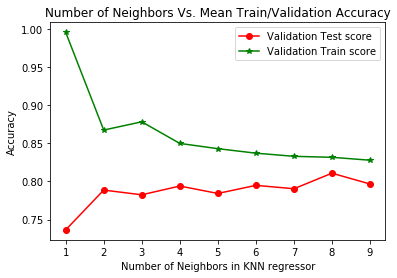

In [157]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

In [158]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_class, y_train)
print('Train score on best parameters {}'.format(knn.score(X_train_class,y_train)))
print('Test score on best parameters {}'.format(knn.score(X_test_class,y_test)))

Train score on best parameters 0.8311229000884174
Test score on best parameters 0.8116710875331565


### Model 2 - Logistic Regression
#### Grid search to find the best parameters for the model

In [159]:
from sklearn.linear_model import LogisticRegression
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
grid_search = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid_svm, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.804598


#### Building the model on the best parameter

In [160]:
lg = LogisticRegression(C=1,penalty='l2', solver = 'liblinear').fit(X_train_class, y_train)
print('Train score on best parameters for Logistic Regression model {:.3f}'.format(lg.score(X_train_class,y_train)))
print('Test score on best parameters for Logistic Regression model {:.3f}'.format(lg.score(X_test_class,y_test)))

Train score on best parameters for Logistic Regression model 0.814
Test score on best parameters for Logistic Regression model 0.822


#### Confusion matrix for the model

In [161]:
from sklearn.metrics import confusion_matrix

pred_logreg_test = lg.predict(X_test_class)
pred_logreg_train = lg.predict(X_train_class)
confusion_test = confusion_matrix(y_test, pred_logreg_test)
confusion_train = confusion_matrix(y_train, pred_logreg_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[256  27]
 [ 40  54]]
Confusion matrix for train:
[[791  52]
 [158 130]]


### Model 3 - Support Vector Machine Classifier
#### Grid Search to find the best parameters

In [162]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'degree':[1,2,3,4,5,6,7,8,9,10]}

grid_search = GridSearchCV(SVC(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_class, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_class, y_test)))

Best parameters: {'C': 100, 'degree': 1, 'gamma': 0.01}
Best cross-validation score: 0.80
Test set score: 0.82


In [163]:
clf1 = LinearSVC(C=100).fit(X_train_class, y_train)
clf2 = SVC(kernel='linear', C=100).fit(X_train_class, y_train)
clf3 = SVC(kernel='rbf', gamma=0.01, C=100).fit(X_train_class, y_train)
clf4 = SVC(kernel='poly', degree=1, C=100).fit(X_train_class, y_train)
print('Train score on best parameters for LinearSVC - {}'.format(clf1.score(X_train_class, y_train)))
print('Test score on best parameters ffor LinearSVC - {}'.format(clf1.score(X_test_class,y_test)))
print('Train score on best parameters for SVC kernel - Linear :{}'.format(clf2.score(X_train_class,y_train)))
print('Test score on best parameters for SVC kernel - Linear :{}'.format(clf2.score(X_test_class,y_test)))
print('Train score on best parameters for SVC kernel - rbf :{}'.format(clf3.score(X_train_class,y_train)))
print('Test score on best parameters for SVC kernel - rbf :{}'.format(clf3.score(X_test_class,y_test)))
print('Train score on best parameters for SVC kernel - poly :{}'.format(clf4.score(X_train_class,y_train)))
print('Test score on best parameters for SVC kernel - poly :{}'.format(clf4.score(X_test_class,y_test)))

Train score on best parameters for LinearSVC - 0.7789566755083996
Test score on best parameters ffor LinearSVC - 0.7771883289124668
Train score on best parameters for SVC kernel - Linear :0.8037135278514589
Test score on best parameters for SVC kernel - Linear :0.8222811671087533
Train score on best parameters for SVC kernel - rbf :0.8169761273209549
Test score on best parameters for SVC kernel - rbf :0.8249336870026526
Train score on best parameters for SVC kernel - poly :0.8045977011494253
Test score on best parameters for SVC kernel - poly :0.8222811671087533


### Model 4 - Decision Tree Classifier
#### Grid search to find best parameters for the model

In [164]:
param_grid = {'max_depth': np.arange(1, 10)}

grid_search.fit(X_train_class, y_train)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.76


#### Building the model on best parameters

In [165]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train_class, y_train)

print("Accuracy on training set: {:.6f}".format(dtree.score(X_train_class, y_train)))
print("Accuracy on test set: {:.6f}".format(dtree.score(X_test_class, y_test)))

Accuracy on training set: 0.822281
Accuracy on test set: 0.827586


### Comparing accuracies for Classification models before and after PCA

In [166]:
# Index Levels
outside = ['Before PCA','Before PCA','After PCA','After PCA']
inside = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [167]:
data_class = np.array([(0.820,0.824,0.810,0.803,0.881,0.828,0.854),
                     (0.824,0.824,0.827,0.822,0.816,0.835,0.809),
                     (0.831,0.814,0.795,0.803,0.816,0.803,0.822),
                     (0.811,0.822,0.824,0.822,0.824,0.822,0.827)])

In [168]:
df = pd.DataFrame(data_class,index=hier_index,columns=['KNN','Logistic','LinearSVC','SVC kernel - Linear','SVC kernel - rbf','SVC kernel - poly','Decision Tree'])

In [169]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='YlOrRd')
s

# **Observation**
### It shows that PCA didn't help us improve accuracy but it has definitely reduced the computation as it has brought down the number of features from 42 to 25, so we would go ahead with models on which PCA is applied


### Deep Learning Classification

In [170]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [171]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(42, input_dim=42, activation='relu'))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [172]:
seed = 10
np.random.seed(10)

In [173]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,25,30,35,40] , 'epochs':[10, 50,60,70, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 10)

In [174]:
grid_search_result = grid_search.fit(X_train, y_train)


In [175]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 30, 'epochs': 50}
Best cross-validation score: 0.80


In [176]:
# create model
model = Sequential()

model.add(Dense(42, input_dim=42, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [177]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [178]:
# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=30)

Epoch 1/50
1131/1131 [==============================] - 0s 140us/step - loss: 0.6277 - accuracy: 0.7392
Epoch 2/50
1131/1131 [==============================] - 0s 43us/step - loss: 0.5422 - accuracy: 0.7454
Epoch 3/50
1131/1131 [==============================] - 0s 34us/step - loss: 0.4877 - accuracy: 0.7524
Epoch 4/50
1131/1131 [==============================] - 0s 42us/step - loss: 0.4582 - accuracy: 0.7966
Epoch 5/50
1131/1131 [==============================] - 0s 49us/step - loss: 0.4371 - accuracy: 0.8064
Epoch 6/50
1131/1131 [==============================] - 0s 41us/step - loss: 0.4227 - accuracy: 0.8090
Epoch 7/50
1131/1131 [==============================] - 0s 41us/step - loss: 0.4131 - accuracy: 0.8108
Epoch 8/50
1131/1131 [==============================] - 0s 42us/step - loss: 0.4052 - accuracy: 0.8081
Epoch 9/50
1131/1131 [==============================] - 0s 44us/step - loss: 0.3998 - accuracy: 0.8143
Epoch 10/50
1131/1131 [==============================] - 0s 39us/step - 

In [179]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

377/377 [==============================] - 0s 63us/step

accuracy: 83.02%


In [180]:
y_predict = model.predict(X_test)
y_predict 

array([[0.00356565],
       [0.00923516],
       [0.0604303 ],
       [0.20634992],
       [0.4062492 ],
       [0.6019307 ],
       [0.11961535],
       [0.38759807],
       [0.01877691],
       [0.00610666],
       [0.21447356],
       [0.01489556],
       [0.01269318],
       [0.0177662 ],
       [0.00730917],
       [0.01713536],
       [0.37388852],
       [0.00702633],
       [0.01176758],
       [0.00583481],
       [0.17822142],
       [0.59653056],
       [0.00552942],
       [0.88029504],
       [0.03829678],
       [0.10237647],
       [0.3646513 ],
       [0.0561085 ],
       [0.01035379],
       [0.00811786],
       [0.02760966],
       [0.00720369],
       [0.0107087 ],
       [0.00366899],
       [0.01085952],
       [0.3796273 ],
       [0.00524406],
       [0.08172024],
       [0.29370555],
       [0.01417484],
       [0.51302236],
       [0.0117491 ],
       [0.53462887],
       [0.3753242 ],
       [0.01548271],
       [0.14467663],
       [0.5489324 ],
       [0.083